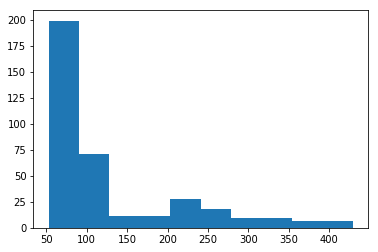

(434, 370)


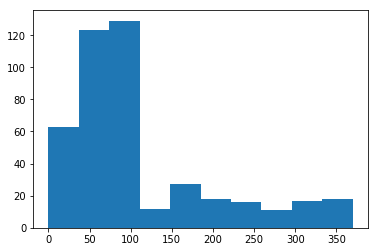

(434, 370)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('ArabiTomato/original_data/ArabiTomato_alignment_NB.fasta') as f:
    gene_IDs = []
    sequences = []
    for i, line in enumerate(f):
        if (i % 2) == 0:
            gene_IDs.append(line[:-1])
        else:
            sequences.append(list(line[:-1]))
data = pd.DataFrame(sequences)
data["gene_IDs"] = gene_IDs
data = data.set_index("gene_IDs")

# extract AtZAR1 position
data = data.loc[:, data.loc[">AtZAR1", :] != "-"]
data
# count "-"
no_data_count = data == "-"
no_data_count = no_data_count.sum()
plt.hist(no_data_count)
plt.show()

# extract amino acid with many gene having
extract_amino = no_data_count < 100000
extract_data = data.loc[:, extract_amino]
print(extract_data.shape)

no_data_count = extract_data == "-"
extract_amino = no_data_count.sum(axis=1) < 28000
plt.hist(no_data_count.sum(axis=1))
plt.show()
extract_data = extract_data.loc[extract_amino, :]
print(extract_data.shape)

# to fasta
with open("ArabiTomato/original_data/ArabiTomato_alignment_NB_AtZAR1.fasta", mode='w') as f:
    for i in range(extract_data.shape[0]):
        f.write(extract_data.index[i])
        f.write("\n")
        f.write("".join(extract_data.iloc[i, :].tolist()))
        f.write("\n")


In [5]:
import pandas as pd
import numpy as np
import sys
from Bio import SeqIO


### cut based on K of GKTT
with open("ArabiTomato/original_data/ArabiTomato_alignment_NB_AtZAR1_cutK.fasta", mode='w') as f:

    for record in SeqIO.parse('ArabiTomato/original_data/ArabiTomato_alignment_NB_AtZAR1.fasta', 'fasta'):
        id_part = record.id
        desc_part = record.description
        seq = record.seq
        if str(record.seq)[50] == "K":
            print(id_part)
            print(str(record.seq)[49:53])
            f.write(">"+id_part)
            f.write("\n")
            f.write(str(record.seq))
            f.write("\n")

AT5G63020
GKTT
RPS5
GKTT
AT1G12280
GKTT
AT1G12210
GKTT
AT4G10780
GKTT
AT1G12290
GKTT
AT1G63350
GKTT
AT1G62630
GKTT
AT1G63360
GKTT
AT1G61310
GKTT
AT1G61180
GKTT
AT1G61300
GKTT
AT1G61190
GKTT
AT5G43730
GKTT
AT5G43740
GKTT
AT1G51480
GKTT
AT1G15890
GKTT
AT5G05400
GKTT
AT5G47260
GKTT
AT5G47250
GKTT
AT3G15700
GKTT
AT1G52660
GKTT
RPS2
GKTT
AT4G27220
GKTT
AT4G27190
GKTT
Solyc06g048910
GKTS
Solyc08g013970
GKTT
Solyc08g007250
GKTT
Solyc01g067165
GKTT
Solyc03g094100
GKTI
Solyc04g005540
GKTT
Solyc04g005550
GKTT
Solyc10g055140
GKTT
Solyc10g055170
GKTT
Solyc12g044180
GKTT
Solyc12g044190
GKTS
Solyc12g044200
GKTT
Solyc10g054940
GKTT
Solyc10g054970
GKTT
Solyc10g055050
GKTT
Solyc02g036270
GKTT
Solyc03g046207
GKTT
Solyc02g037540
GKTT
Solyc10g076440
GKTT
Solyc11g007790
GKTT
AT3G14460
GKTT
AT3G14470
GKTT
R3a
GKTT
Solyc08g007630
GKTT
Solyc11g071995
GKTT
Solyc11g065780
GKTT
Solyc11g069620
GKTT
Solyc11g069925
GKTT
Solyc03g078300
GKTT
Solyc09g005290
GKTT
Solyc01g106410
GKTT
Solyc08g075630
GKTT
Solyc08g075640
G